# !Link to challenge!

# https://www.kaggle.com/t/b3ced76a60b94572a90740756f778fc8

### Ideas:

- Use some of test set for training? 
- Is training / validation split (0.1/0.9) appropriate? 

### Metric

For binary classification with a true label y $\in \{0,1\}$ and a probability estimate p = $\operatorname{Pr}(y = 1)$, the log loss per sample is the negative log-likelihood of the classifier given the true label:
$$
L_{\log}(y, p) = -\log \operatorname{Pr}(y|p) = -(y \log (p) + (1 - y) \log (1 - p))$
$$

This extends to the multiclass case as follows. Let the true labels for a set of samples be encoded as a 1-of-K binary indicator matrix Y, i.e., $y_{i,k} = 1$ if sample i has label k taken from a set of K labels. Let P be a matrix of probability estimates, with $p_{i,k} = \operatorname{Pr}(t_{i,k} = 1)$. Then the log loss of the whole set is

$$
L_{\log}(Y, P) = -\log \operatorname{Pr}(Y|P) = - \frac{1}{N} \sum_{i=0}^{N-1} \sum_{k=0}^{K-1} y_{i,k} \log p_{i,k}
$$

# Grading

#### Firstly, to get any mark, you must beat medium baseline score

Your grade after challenge ends will be calculated as this:
$$
Grade = \frac{score - mid\_baseline\_score}{\#1\_score - mid\_baseline\_score} * 10
$$

where score will be taken from private part results.

## About

In this notebook we prepare a simple solution.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

### Read training and test files

In [6]:
data = pd.read_csv('/Users/bainbrid/Repositories/MLatImperial2018/03_lab/training.csv')
test = pd.read_csv('/Users/bainbrid/Repositories/MLatImperial2018/03_lab/test.csv')

In [7]:
data.head()

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,...,TrackNDoF,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton
0,74791.156263,15.0,0.232275,1.0,1.0,3.2,-2.505719,6.604153,1.0,1.929960,...,28.0,1.0,-7.213300,-0.280200,5586.589846,1.0,1.0,10.422315,-2.081143e-07,-24.824400
1,2738.489989,15.0,-0.357748,0.0,1.0,3.2,1.864351,0.263651,1.0,-2.061959,...,32.0,1.0,-0.324317,1.707283,-0.000007,0.0,1.0,43.334935,2.771583e+00,-0.648017
2,2161.409908,17.0,-999.000000,0.0,0.0,-999.0,-999.000000,-999.000000,0.0,-999.000000,...,27.0,0.0,-999.000000,-999.000000,-999.000000,0.0,0.0,-999.000000,-9.990000e+02,-999.000000
3,15277.730490,20.0,-0.638984,0.0,1.0,3.2,-2.533918,-8.724949,1.0,-3.253981,...,36.0,1.0,-35.202221,-14.742319,4482.803707,0.0,1.0,2.194175,-3.070819e+00,-29.291519
4,7563.700195,19.0,-0.638962,0.0,1.0,3.2,-2.087146,-7.060422,1.0,-0.995816,...,33.0,1.0,25.084287,-10.272412,5107.554680,0.0,1.0,0.000015,-5.373712e+00,23.653087


In [8]:
test.head()

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,...,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton,ID
0,55086.199233,18.0,-0.438763,0.0,1.0,3.2,-1.843821,-4.579244,1.0,-1.732886,...,1.0,18.674086,-1.355015,24510.990244,0.0,1.0,9.325265,-0.250015,35.408585,0
1,3393.820071,17.0,-0.554341,0.0,1.0,0.0,-0.883237,-6.203035,1.0,-0.097206,...,1.0,16.536804,-17.601196,778.675303,0.0,1.0,-0.000006,-6.646096,14.011904,1
2,18341.359361,12.0,-0.554339,0.0,1.0,0.0,-2.653786,-3.922639,1.0,0.936484,...,1.0,-1.306109,-4.536409,7915.212420,0.0,1.0,1.371346,-2.132609,-5.617409,2
3,27486.710933,7.0,-0.492411,1.0,1.0,3.2,-999.000000,2.034453,1.0,-999.000000,...,1.0,-4.222793,3.149207,-999.000000,1.0,1.0,61.985428,0.946207,-8.657193,3
4,6842.249996,16.0,0.098706,0.0,1.0,3.2,2.644499,-1.471364,1.0,-2.909470,...,1.0,-3.425113,23.147387,-0.000013,0.0,1.0,2.468453,2.614987,-5.713513,4


### Look at the labels set

In [9]:
set(data.Label)

{'Electron', 'Ghost', 'Kaon', 'Muon', 'Pion', 'Proton'}

### Define training features

Exclude `Label` from the features set

In [10]:
features = list(set(data.columns) - {'Label'})
print(features)

['RICHpFlagProton', 'MuonLooseFlag', 'TrackQualitySubdetector1', 'RICH_DLLbeKaon', 'FlagSpd', 'TrackQualityPerNDoF', 'TrackNDoF', 'RICH_DLLbeProton', 'HcalE', 'EcalShowerLongitudinalParameter', 'MuonLLbeMuon', 'RICH_DLLbeBCK', 'RICHpFlagPion', 'TrackP', 'DLLproton', 'TrackPt', 'MuonLLbeBCK', 'FlagHcal', 'FlagRICH1', 'RICHpFlagElectron', 'TrackDistanceToZ', 'FlagRICH2', 'RICH_DLLbeElectron', 'Calo3dFitQuality', 'SpdE', 'Calo2dFitQuality', 'FlagEcal', 'RICHpFlagMuon', 'FlagMuon', 'PrsE', 'EcalDLLbeElectron', 'DLLkaon', 'TrackNDoFSubdetector1', 'RICH_DLLbeMuon', 'RICHpFlagKaon', 'TrackQualitySubdetector2', 'DLLelectron', 'DLLmuon', 'PrsDLLbeElectron', 'GhostProbability', 'HcalDLLbeMuon', 'EcalDLLbeMuon', 'BremDLLbeElectron', 'FlagPrs', 'MuonFlag', 'TrackNDoFSubdetector2', 'EcalE', 'FlagBrem', 'HcalDLLbeElectron']


In [11]:
test_features = list(set(test.columns) - {'Label'})
list(set(features) - set(test_features))

[]

### Divide training data into 2 parts

In [12]:
training_data, validation_data = train_test_split(data, random_state=11, train_size=0.10)

/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [13]:
len(training_data), len(validation_data)

(120000, 1080000)

### Simple logistic regression forest from `sklearn` training

train multiclassification model

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(training_data[features])

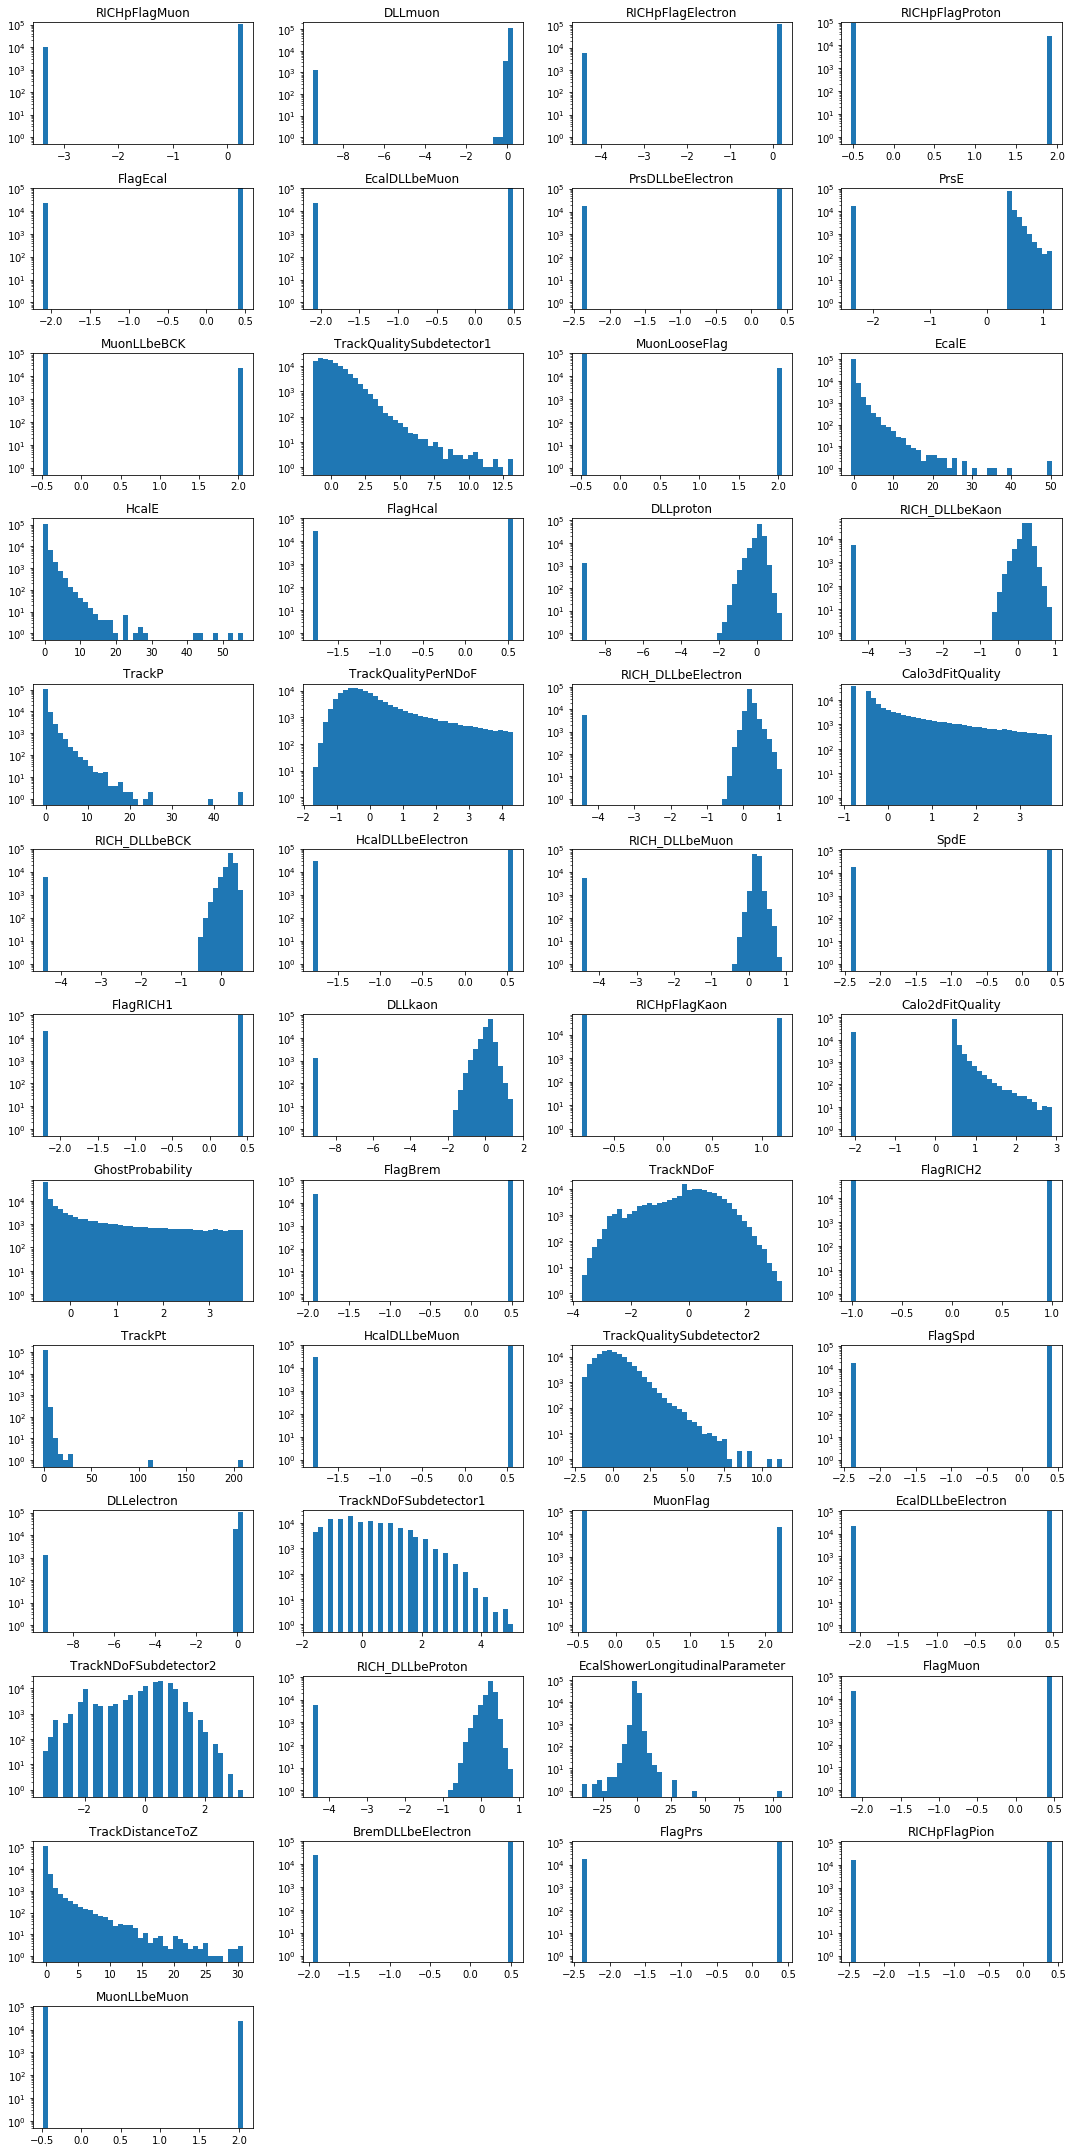

In [100]:
_features = features[:]

import matplotlib.pyplot as plt
plt.close('all')
fig = plt.figure(figsize=(15,30))
ncol = 4
nrow = int(len(_features)/4)+1
for ifeature, feature in enumerate(_features) :
    plt.subplot(nrow,ncol,ifeature+1)
    plt.hist(X_train[:,ifeature],bins=40)
    plt.yscale('log')
    plt.ylim(0.5)
    plt.title(feature)
plt.subplots_adjust(top=0.92, 
                    bottom=0.08,
                    left=0.10,
                    right=0.95,
                    hspace=0.25,
                    wspace=0.35)
plt.tight_layout()
plt.show()

In [ ]:
%%time

clf = LogisticRegression(penalty='l2', n_jobs=-1, solver='saga', multi_class='multinomial', random_state=42)
param_grid = {'C': [0.1, 1]}

gscv = GridSearchCV(clf, param_grid, scoring='neg_log_loss', cv=3, n_jobs=-1, verbose=1)
gscv.fit(X_train, training_data.Label)

In [ ]:
gscv.cv_results_

Train best model:

In [ ]:
c = 1
clf = LogisticRegression(penalty='l2', C=c, n_jobs=-1, solver='saga', multi_class='multinomial')
clf.fit(X_train, training_data.Label)

### Evaluate predictions on the validation sample

In [ ]:
# predict each track
X_val = scaler.fit_transform(validation_data[features])
proba = clf.predict_proba(X_val)

### Log loss on the cross validation sample

In [ ]:
log_loss(validation_data.Label, proba)

## Prepare submission to kaggle

In [ ]:
# predict test sample
X_test = scaler.fit_transform(test[features])
kaggle_proba = clf.predict_proba(X_test)
kaggle_ids = test.ID

In [ ]:
from IPython.display import FileLink

def create_solution(ids, proba, names, filename='baseline.csv'):
    """saves predictions to file and provides a link for downloading """
    solution = pd.DataFrame({'ID': ids})
    
    for name in ['Ghost', 'Electron', 'Muon', 'Pion', 'Kaon', 'Proton']:
        solution[name] = proba[:, np.where(names == name)[0]]
    
    solution.to_csv('{}'.format(filename), index=False)
    return FileLink('{}'.format(filename))
    
create_solution(kaggle_ids, kaggle_proba, clf.classes_)

### Original values in this notebook:

cv_results:

`{'mean_fit_time': array([38.14414843, 29.29394372]),
 'mean_score_time': array([0.78987058, 0.51299063]),
 'mean_test_score': array([-0.87774634, -0.87361161]),
 'mean_train_score': array([-0.87553757, -0.87138096]),
 'param_C': masked_array(data=[0.1, 1],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.1}, {'C': 1}],
 'rank_test_score': array([2, 1], dtype=int32),
 'split0_test_score': array([-0.90848259, -0.90595279]),
 'split0_train_score': array([-0.90506437, -0.90247521]),
 'split1_test_score': array([-0.81828495, -0.81098105]),
 'split1_train_score': array([-0.81632204, -0.80901035]),
 'split2_test_score': array([-0.90647142, -0.90390092]),
 'split2_train_score': array([-0.9052263 , -0.90265731]),
 'std_fit_time': array([0.06862851, 6.26000325]),
 'std_score_time': array([0.21650906, 0.29381614]),
 'std_test_score': array([0.04205356, 0.04429441]),
 'std_train_score': array([0.04187175, 0.04410274])}`

Log loss:
    
0.8708192073428047